# **TSF GRIP INTERNSHIP : TASK 3**

DATA SCIENCE AND BUSINESS ANALYTICS INTERSHIP

Batch-#gripseptember2022

**Realised by : Sirine Bousarsar**



*   **Importing Libraries**






In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



*   **Load the dataset and create the dataframe**






In [3]:
data = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')
print("Data imported successfully")
data

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB




*   **Preprocessing**



In [6]:
# Drop all the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600




*   **Understanding Target variable**



In [8]:
data.Profit.unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [9]:
data.Profit.value_counts()

0.0000     65
6.2208     42
9.3312     36
3.6288     31
5.4432     30
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: Profit, Length: 7287, dtype: int64



*   **Data Visualisation**




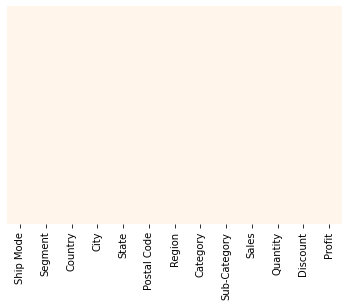

In [13]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'Oranges')



*   **Analyzing correlation between features and target variable(Profit) in the dataset**




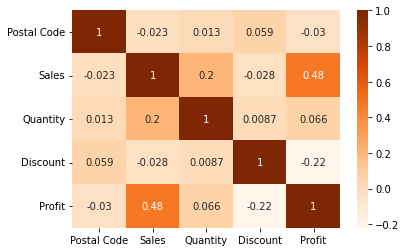

In [20]:
sns.heatmap(data.corr(),cmap='Oranges', annot=True)



*   *Profit and Sales have a large positive correlation, but profit and discount have a negative correlation.*






*   **Data Analysis based on states**




In [21]:
data_sales = data.groupby(['State'], as_index=False).Sales.sum()
data_sales

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457576.2715
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


Text(0.5, 1.0, 'Sales per State')

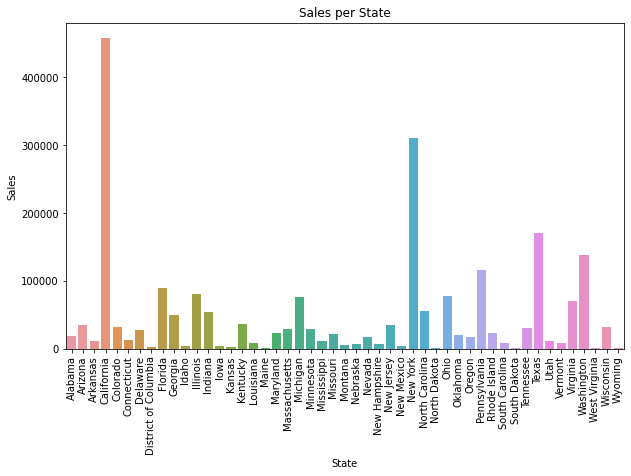

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', data=data_sales)
plt.xticks(rotation=90)
plt.title('Sales per State')



*   *New York and California have the highest sales among states*




In [23]:
# Profit per State
data_profit = data.groupby(['State'], as_index=False).Profit.sum()
data_profit

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


Text(0.5, 1.0, 'Profit per State')

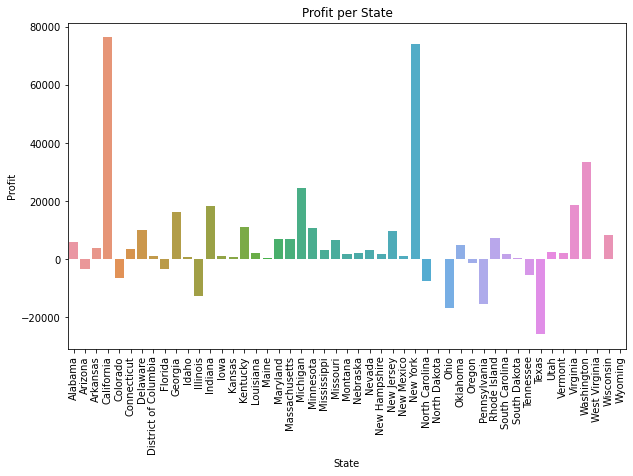

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Profit', data=data_profit)
plt.xticks(rotation=90)
plt.title('Profit per State')







*   *Texas, Illinois, Florida, Colorado, Arizona, North Carolina, Ohio, Pennsylvania, and Tennesse they're not making a positive profit. So those are the weak areas.*
*   *California and New York made the highest profit of all states.*









In [28]:
# correlation between sales and profit for weak areas
weak_areas = data.query('Profit <= 0')
weak_areas.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

,Sales,Profit
State,,
Texas,105054.0378,-36813.1875
Pennsylvania,78976.7420,-21602.8515
Ohio,51145.9660,-21737.9414
Florida,49400.7960,-8689.8295
California,42278.3660,-3769.6651
Illinois,39349.8120,-19495.4605
New York,28712.9800,-5031.1378
North Carolina,28590.4600,-11557.9854
Tennessee,17746.4970,-7257.0174


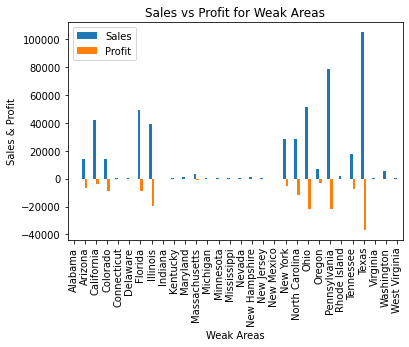

In [29]:
# relation between sales and profit for weak areas
weak_areas.groupby('State')[['Sales', 'Profit']].sum().plot(kind='bar')
plt.xlabel('Weak Areas')
plt.ylabel('Sales & Profit')
plt.title('Sales vs Profit for Weak Areas')
plt.show();



*   *Texas has the highest Sales but also the lowest profit.*






*   **Data analysis based on Category**




In [30]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of each category')

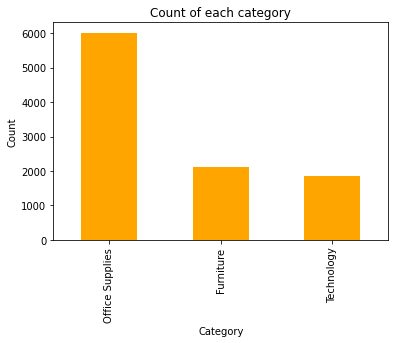

In [33]:
data['Category'].value_counts().plot(kind='bar' , color="Orange")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of each category')

In [34]:
data_category = data.groupby('Category')[['Profit','Sales']].sum()
data_category

,Profit,Sales
Category,,
Furniture,18421.8137,741306.3133
Office Supplies,122364.6608,718735.2440
Technology,145454.9481,836154.0330




*   *Office Supplies have the highest profit and the lowest sales.*




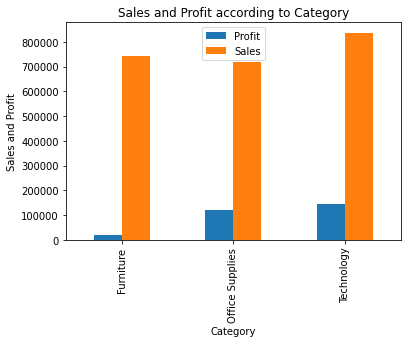

In [36]:
data_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Sales and Profit')
plt.title('Sales and Profit according to Category')
plt.show();



*   *Fourniture has the lowest profit.*






*   **Data Analysis based on sub category**




In [37]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0.5, 1.0, 'Count of each Sub-category')

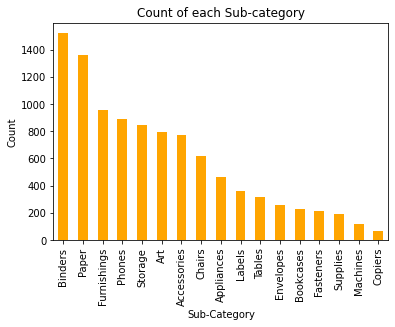

In [39]:
data['Sub-Category'].value_counts().plot(kind='bar', color="Orange")
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Count of each Sub-category')



*   *Binders is the most popular sub-Category.*




In [40]:
data_sub_category = data.groupby('Sub-Category')[['Profit','Sales']].sum()
data_sub_category

,Profit,Sales
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6524.6118,27107.0320
Binders,30228.0003,203409.1690
Bookcases,-3472.5560,114879.9963
Chairs,26567.1278,327777.7610
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


**Conclusion**

**In states:**
*   Texas has the lowest profit while California has the highest.
*  Texas has the lowest profit while California has the highest.
*   According to weak areas, Texas has the highest sales.

  **In category:**
*   Office supplies category is the most popular category.
*   Furniture is the lowest category in profit.

  **In sub-category:**


*   The binders subcategory is the most popular subcategory.
*   Tables subcategory is the least profitable.
* chairs and phones are the highest sales.














